<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json


In [0]:
covidtrackingurl = "https://covidtracking.com/api/states/daily"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/03-23-2020.csv"
dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [114]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-03-23 23:19:34,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-23 23:19:34,30.295065,-92.414197,1,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-23 23:19:34,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-23 23:19:34,43.452658,-116.241552,13,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-23 23:19:34,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [116]:
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending', 'total']].sum()
print(res)
print(f"Current Infection Rate {res.positive/res.total*100:2f}%")
print(f"Percentage of US: {res.positive/330000000*100:2f}%")

positive     42164
negative    237321
pending      14571
total       294056
dtype: int64
Current Infection Rate 14.338765%
Percentage of US: 0.012777%


In [117]:
dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(),['state', 'positive']].sort_values(by='positive', ascending=False).head(10)

,state,positive
37,NY,20875
34,NJ,2844
52,WA,1996
5,CA,1733
24,MI,1328
16,IL,1285
20,LA,1172
10,FL,1171
21,MA,777
11,GA,772


In [0]:
#Compare growth from 20200311 and 202020313
dtstart = 20200311
dtend = 20200317
dfCA = dfCovidtracking[dfCovidtracking.state=='CA']

In [119]:
arCols = ['positive', 'negative', 'death']
arTotCols= ['positive', 'negative']

dfUSAstart = dfCovidtracking.loc[dfCovidtracking.date == dtstart, arCols].sum()
print(dfUSAstart)
print(dfUSAstart.loc[arTotCols].sum())
dfUSAend = dfCovidtracking.loc[dfCovidtracking.date == dtend, arCols].sum()
print(dfUSAend)
print(dfUSAend.loc[arTotCols].sum())


positive    1053
negative    5978
death         27
dtype: int64
7031
positive     5723
negative    47604
death          90
dtype: int64
53327


In [0]:
gbUSA = dfCovidtracking.groupby(['date'])
gbCA = dfCovidtracking[dfCovidtracking.state=='CA'].groupby(['date'])

dfUSAPos = gbUSA.positive.sum().reset_index().copy()
dfCAPos = gbCA.positive.sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 
dfUSAPos['PCT']= dfUSAPos.positive/dfUSAPos.max().positive
dfCAPos['PCT']=dfCAPos.positive/dfCAPos.max().positive

In [121]:
dfUSAPos

,date,positive,PCT
0,20200304,118,0.002799
1,20200305,176,0.004174
2,20200306,223,0.005289
3,20200307,341,0.008087
4,20200308,417,0.009890
5,20200309,584,0.013851
6,20200310,778,0.018452
7,20200311,1053,0.024974
8,20200312,1315,0.031188
9,20200313,1922,0.045584


In [122]:
dfCAPos

,date,positive,PCT
0,20200304,53,0.030583
1,20200305,53,0.030583
2,20200306,60,0.034622
3,20200307,69,0.039815
4,20200308,88,0.050779
5,20200309,114,0.065782
6,20200310,133,0.076746
7,20200311,157,0.090594
8,20200312,202,0.116561
9,20200313,202,0.116561


In [123]:
gbUSA.sum()

,positive,negative,pending,hospitalized,death,total
date,,,,,,
20200304,118,748,103,0.0,0,969
20200305,176,953,197,0.0,0,1326
20200306,223,1571,458,0.0,0,2252
20200307,341,1809,602,0.0,0,2752
20200308,417,2335,347,0.0,0,3099
20200309,584,3367,313,0.0,0,4264
20200310,778,3807,469,0.0,0,5054
20200311,1053,5978,563,0.0,27,7617
20200312,1315,7949,673,0.0,36,9966


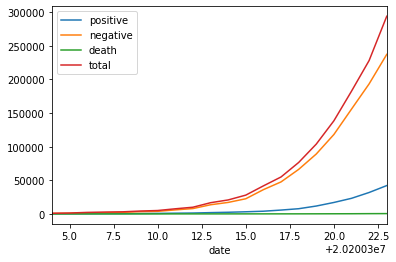

In [124]:
gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

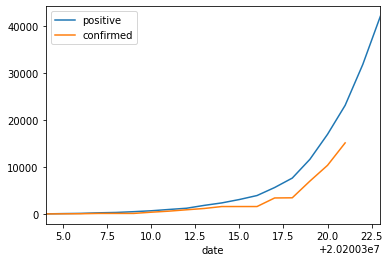

In [125]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

In [126]:
gbCA.sum().sort_values(by='date')

,positive,negative,pending,hospitalized,death,total
date,,,,,,
20200304,53,462,0,0.0,0,515
20200305,53,462,0,0.0,0,515
20200306,60,462,0,0.0,0,522
20200307,69,462,0,0.0,0,531
20200308,88,462,0,0.0,0,550
20200309,114,690,0,0.0,0,804
20200310,133,690,0,0.0,0,823
20200311,157,916,0,0.0,0,1073
20200312,202,916,0,0.0,4,1118


In [127]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-03-23 23:19:34,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-23 23:19:34,30.295065,-92.414197,1,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-23 23:19:34,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-23 23:19:34,43.452658,-116.241552,13,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-23 23:19:34,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [128]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    43667
dead           552
dtype: int64

In [129]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    2108
dead           39
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [131]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
China             81496
Italy             63927
US                43667
Spain             35136
Germany           29056
Iran              23049
France            20123
Korea, South       8961
Switzerland        8795
United Kingdom     6726
Name: confirmed, dtype: int64

In [132]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(20)

country
China             81496
Italy             63927
US                43667
Spain             35136
Germany           29056
Iran              23049
France            20123
Korea, South       8961
Switzerland        8795
United Kingdom     6726
Netherlands        4764
Austria            4474
Belgium            3743
Norway             2621
Canada             2088
Portugal           2060
Sweden             2046
Brazil             1924
Australia          1682
Denmark            1572
Name: confirmed, dtype: int64

In [0]:
dfData = dfCovidtracking.groupby('date')

In [0]:
dfStateTotal = dfCovidtracking[['state', 'positive']].groupby(by='state').max() \
.rename(columns={'positive':'current_total'})


In [0]:
dfState = dfCovidtracking[['date','state','positive']].set_index('state') \
  .join(dfStateTotal)

In [0]:
dfState['pct']=dfState.positive/dfState.current_total

In [137]:
dfState.head()

,date,positive,current_total,pct
state,,,,
AK,20200323,22,22,1.000000
AK,20200322,22,22,1.000000
AK,20200321,14,22,0.636364
AK,20200320,12,22,0.545455
AK,20200319,6,22,0.272727


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

In [139]:
res.head()

state,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MP,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20200304,0.0,0.0,0.0,0.0,0.007547,0.030583,0.000000,0.00000,0.000000,0.0,0.001708,0.002591,0.0,0.000000,0.0,0.0,0.003113,0.000000,0.000000,0.000000,0.0,0.002574,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.003367,0.0,0.00,0.025641,0.000000,0.0,0.000000,0.000287,0.0,0.000000,0.015707,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.002841,0.000000,0.000000,0.0,0.000000,0.019539,0.002404,0.0,0.0
20200305,0.0,0.0,0.0,0.0,0.007547,0.030583,0.000000,0.00000,0.000000,0.0,0.007686,0.002591,0.0,0.000000,0.0,0.0,0.003891,0.000000,0.000000,0.000000,0.0,0.002574,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.003367,0.0,0.00,0.025641,0.000352,0.0,0.004082,0.001054,0.0,0.000000,0.015707,0.000000,0.0,0.000000,0.000000,0.0,0.001626,0.002841,0.000000,0.000000,0.0,0.000000,0.035070,0.002404,0.0,0.0
20200306,0.0,0.0,0.0,0.0,0.011321,0.034622,0.003384,0.00000,0.000000,0.0,0.007686,0.002591,0.0,0.000000,0.0,0.0,0.003891,0.003861,0.000000,0.000000,0.0,0.010296,0.010417,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.006734,0.0,0.00,0.025641,0.000352,0.0,0.004082,0.001581,0.0,0.000000,0.015707,0.003106,0.0,0.000000,0.000000,0.0,0.001626,0.014205,0.000000,0.000000,0.0,0.000000,0.039579,0.002404,0.0,0.0
20200307,0.0,0.0,0.0,0.0,0.018868,0.039815,0.013536,0.00000,0.000000,0.0,0.011956,0.007772,0.0,0.017857,0.0,0.0,0.004669,0.003861,0.000000,0.009615,0.0,0.016731,0.010417,0.0,0.0,0.004255,0.000000,0.0,0.0,0.0,0.006734,0.0,0.02,0.025641,0.001406,0.0,0.004082,0.003641,0.0,0.012346,0.036649,0.003106,0.0,0.018868,0.006689,0.0,0.001626,0.022727,0.003891,0.000000,0.0,0.000000,0.051102,0.002404,0.0,0.0
20200308,0.0,0.0,0.0,0.0,0.018868,0.050779,0.013536,0.00241,0.008621,0.0,0.014518,0.009067,0.0,0.017857,0.0,0.0,0.004669,0.007722,0.012195,0.009615,0.0,0.016731,0.010417,0.0,0.0,0.004255,0.005464,0.0,0.0,0.0,0.006734,0.0,0.02,0.051282,0.002110,0.0,0.004082,0.005030,0.0,0.012346,0.073298,0.006211,0.0,0.028302,0.006689,0.0,0.004878,0.022727,0.003891,0.007874,0.0,0.013333,0.051102,0.002404,0.0,0.0


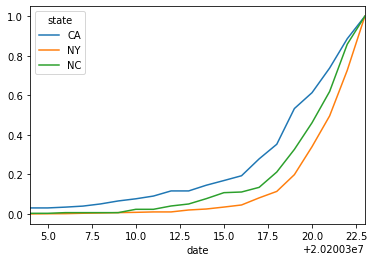

In [140]:
res.loc[:, ['CA','NY','NC']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

In [142]:
dfNYTesting.head()

,negative
date,
20200323,57414
20200322,46233
20200321,35081
20200320,25325
20200319,18132


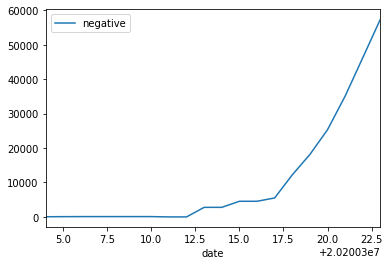

In [143]:
dfNYTesting.plot.line()

In [0]:
dfDates = dfState.reset_index()

In [145]:
dfDates[(dfDates.state.isin(['CA'])) & (dfDates.date>20200318)]

,state,date,positive,current_total,pct
81,CA,20200323,1733,1733,1.000000
82,CA,20200322,1536,1733,0.886324
83,CA,20200321,1279,1733,0.738027
84,CA,20200320,1063,1733,0.613387
85,CA,20200319,924,1733,0.533179


In [146]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-03-23 23:19:34,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-23 23:19:34,30.295065,-92.414197,1,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-23 23:19:34,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-23 23:19:34,43.452658,-116.241552,13,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-23 23:19:34,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [147]:
jhurl


'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-23-2020.csv'